# Detector de Fake News
## Exploração de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [2]:
true = pd.read_csv("Fake and real news dataset/True.csv")
false = pd.read_csv("Fake and real news dataset/Fake.csv")

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true['category'] = 1
false['category'] = 0

In [6]:
noticia = pd.concat([true,false])

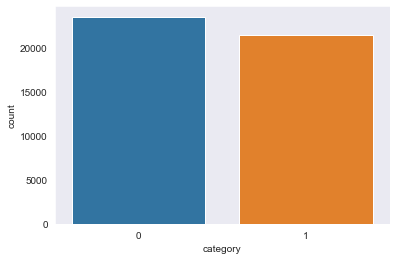

In [7]:
sns.countplot(noticia.category)

In [8]:
noticia.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
noticia.title.count()

44898

In [11]:
noticia.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
"""juncao dos textos em uma unica coluna"""

plt.figure(figsize = (10,10))
chart = sns.countplot(x = "assunto", hue = "categoria" , data = noticia , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
noticia['text'] = noticia['text'] + " " + noticia['title']
del noticia['title']
del noticia['subject']
del noticia['date']

In [ ]:
"""Determinacao de stop words, ou seja, palavras que nao irao agregar na interpretacao do conteudo"""

stop = set(stopwords.words('english'))
ponto = list(string.punctuation)
stop.update(ponto)

In [ ]:
""""""

# pegar o texto html
def html(t):
    aux = BeautifulSoup(t, "html.parser")
    return aux.get_text()

#Remocao de colchetes, chaves e sinais
def remove_colchetes(t):
    return re.sub('\[[^]]*\]', '', t)

# Remocao de URLs
def remove_URL(text):
    return re.sub(r'http\S+', '', t)

#Remocao de stop words
def remove_stopwords(t):
    text_f = []
    for i in t.split():
        if i.strip().lower() not in stop:
            text_f.append(i.strip())
    return " ".join(text_f)

#Remocao de textos com ruidos 
def clear_text(t):
    t = html(t)
    t = remove_colchetes(t)
    t = remove_URL(t)
    t = remove_stopwords(t)
    return t

#Uso da funcao no conjunto de noticias
noticia['text']=noticia['text'].apply(clear_text)

In [ ]:
"""criacao de um wordcloud, essa ferramente auxilia na separacao de palavras e identificacao delas"""

plt.figure(figsize = (20,20)) # noticias reais
wct = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(noticia[noticia.category == 1].text))
plt.imshow(wct , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20)) # noticias falsas
wcf = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(noticia[noticia.category == 0].text))
plt.imshow(wcd , interpolation = 'bilinear')

In [ ]:
"""criacao das amostras de treino e testes"""

x_train, x_test, y_train, y_test = train_test_split(noticia.text, noticia.category, random_state = 0)

max_f = 10000
max_l = 300

In [ ]:
"""Processo de tokenizacao: transformando as palavras em numeros"""

token = text.Tokenizer(num_words=max_f)
token.fit_on_texts(x_train)

# tokenizando amostra de treino
token_train = token.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(token_train, maxlen=max_l)

#tokenizando amostra de teste
token_test = token.texts_to_sequences(x_test)
x_test = sequence.pad_sequences(token_test, maxlen=max_l)

In [ ]:
"""Uso do GloVe para montar uma matriz de relacao entre as palavras"""

